# Customer Requirements:
   - Do a greater number of restaurants provide online delivery as opposed to offline services?
   - Which types of restaurants are the most favored by the general public?
   - What price range is preferred by couples for their dinner at restaurants?

In [18]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the zomato dataset
nickson=pd.read_csv("C:/Users/charl/OneDrive/Desktop/Zomato data.csv")

In [3]:
nickson

,name,online_order,book_table,rating,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
nickson.isnull().sum()

name                           0
online_order                   0
book_table                     0
rating                         0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
nickson.shape

(148, 7)

In [6]:
nickson[f'approx_cost(for two people)'].nunique()

18

In [30]:
nickson.describe(include='all')

,name,online_order,book_table,rating,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148.000000,148.000000,148.000000,148
unique,145,2,2,NaN,NaN,NaN,4
top,San Churro Cafe,No,No,NaN,NaN,NaN,Dining
freq,2,90,140,NaN,NaN,NaN,110
mean,NaN,NaN,NaN,3.633108,264.810811,418.243243,NaN
std,NaN,NaN,NaN,0.402271,653.676951,223.085098,NaN
min,NaN,NaN,NaN,2.600000,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,3.300000,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,3.700000,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,3.900000,221.750000,600.000000,NaN


# removing the rating denominator

In [7]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
nickson['rating']=nickson['rating'].apply(handleRate)
nickson

,name,online_order,book_table,rating,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


# data.info is used to check the data is missing in the table

In [8]:
nickson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rating                       148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Finding majorityof type in listed_in(type) using countplot

Text(0.5, 0, 'Types of restaurent in zomato app')

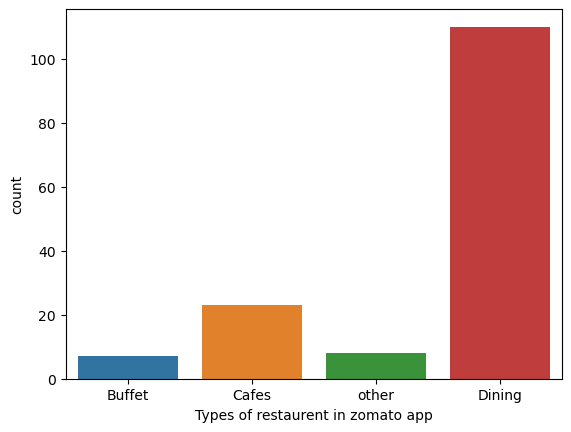

In [25]:
sns.countplot(data=nickson,x='listed_in(type)')
plt.xlabel("Types of restaurent in zomato app")

                        Majority of the restaurent are booked dining

# grouping the votes of people and listed_in(type)

Text(0, 0.5, 'Votes')

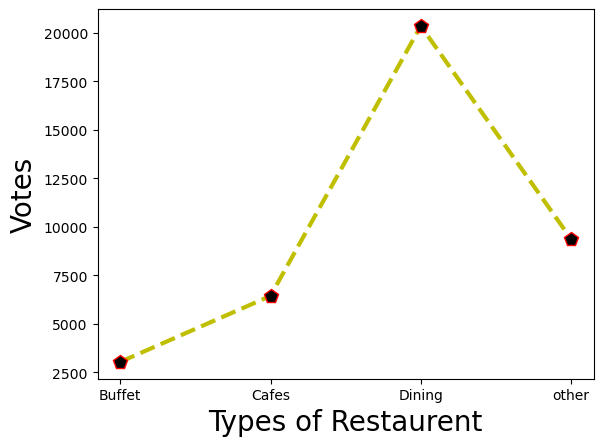

In [10]:
group_data=nickson.groupby('listed_in(type)')['votes'].sum()
plt.plot(group_data,c="y",ls='dashed',marker='p',mfc='k',ms=10,mec='r',lw=3,)
plt.xlabel('Types of Restaurent',c='k',size=20)
plt.ylabel('Votes',c='k',size=20)

       Dining Restaurent are more votes than listed_in(type) and most people are preferred to book dining Restaurent

# finding the maximum votes to the restaurent


In [29]:
max_votes=nickson['votes'].max()
restuarent_max_votes=nickson.loc[nickson['votes']==max_votes,'name']
print('Restaurent that maximum votes:',restuarent_max_votes)

Restaurent that maximum votes: 38    Empire Restaurant
Name: name, dtype: object


# counting the online orders

<Axes: xlabel='online_order', ylabel='count'>

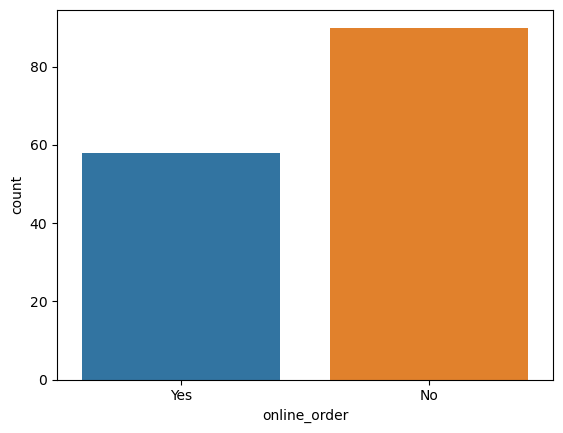

In [12]:
sns.countplot(data=nickson,x='online_order',)

              Less Number of Online order compare to Offline order


# finding maximum rating by customer

C:\Users\charl\AppData\Local\Temp\ipykernel_84\1558005219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nickson['rating'],bins=5,kde=True,rug='listed_in(type)',color='black')


<Axes: xlabel='rating', ylabel='Density'>

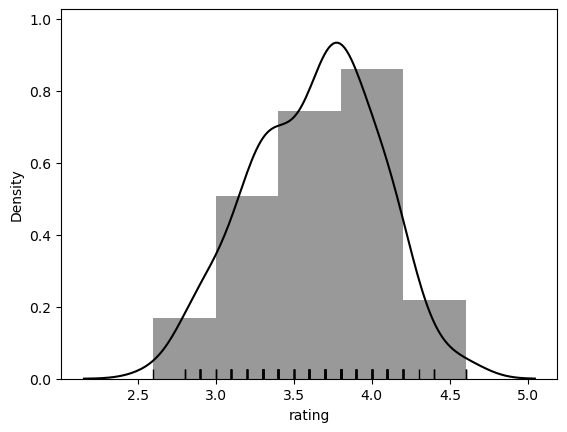

In [13]:
sns.distplot(nickson['rating'],bins=5,kde=True,rug='listed_in(type)',color='black')

           Majority of the restaurent received 3.5 to 4.0 range 

## finding approximate cost of couple 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

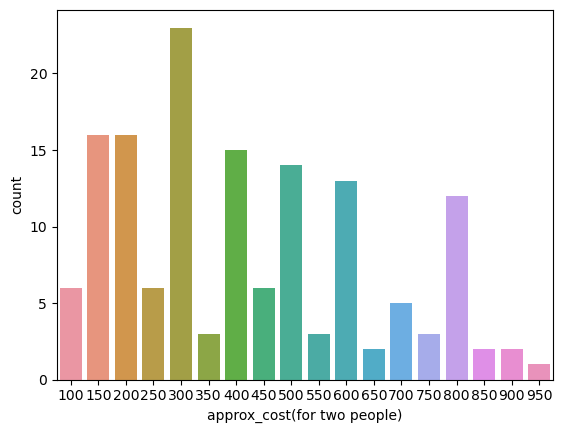

In [14]:
sns.countplot(data=nickson,x='approx_cost(for two people)')

<Axes: xlabel='online_order', ylabel='rating'>

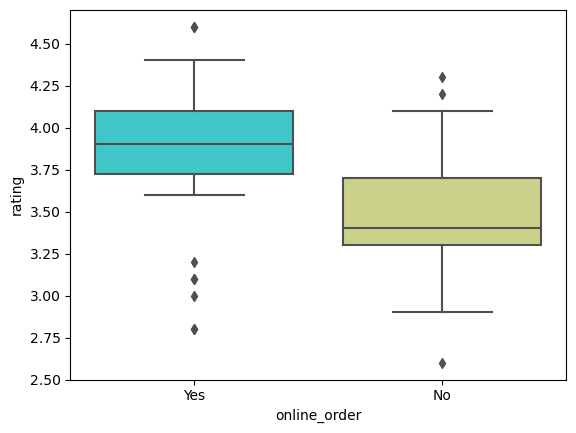

In [22]:
sns.boxplot(x='online_order',y='rating',data=nickson,palette='rainbow',)

             online orders received higher ratings compared to offline orders

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

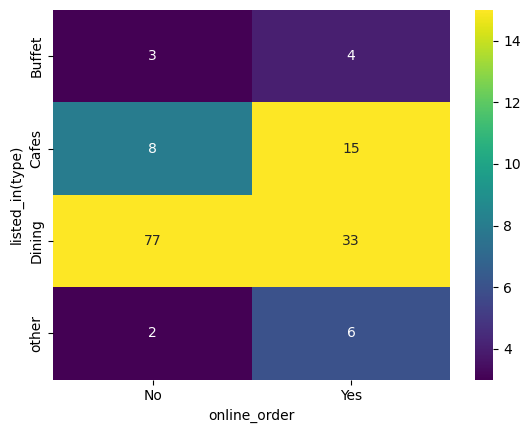

In [16]:
x=nickson.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(x,annot=True,fmt='d',cmap='viridis',vmax=15,vmin=3,)

Dining Restaurants primarly accepting online orders,Whereas cafes primarily receiving online orders.
This suggestion is if you want to order online you can order in cafes.
And if you went to the restaurants kindly go for dining.


In [ ]:
x=df.iloc[0:]